In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [21]:
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [22]:
df.shape

(20640, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
df.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [25]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
Price          3842
dtype: int64

In [26]:
df.isnull().sum()#it checks null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

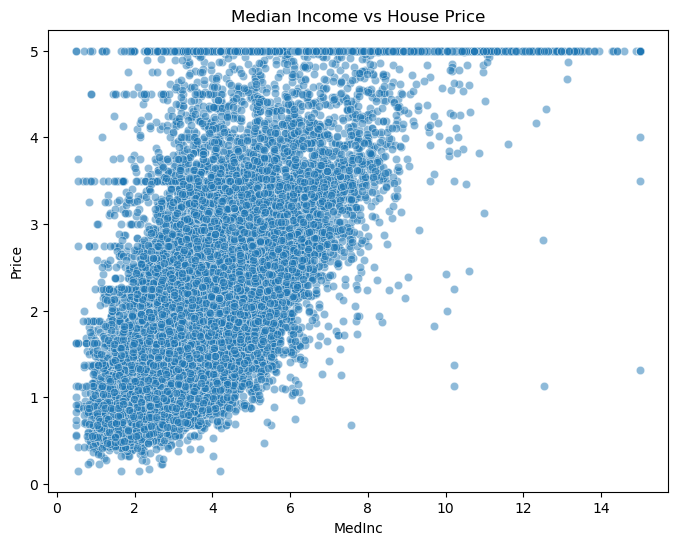

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median Income vs House Price')
plt.show()


In [28]:
print("\nCorrelation with Price:\n",df.corr()['Price'].sort_values())


Correlation with Price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


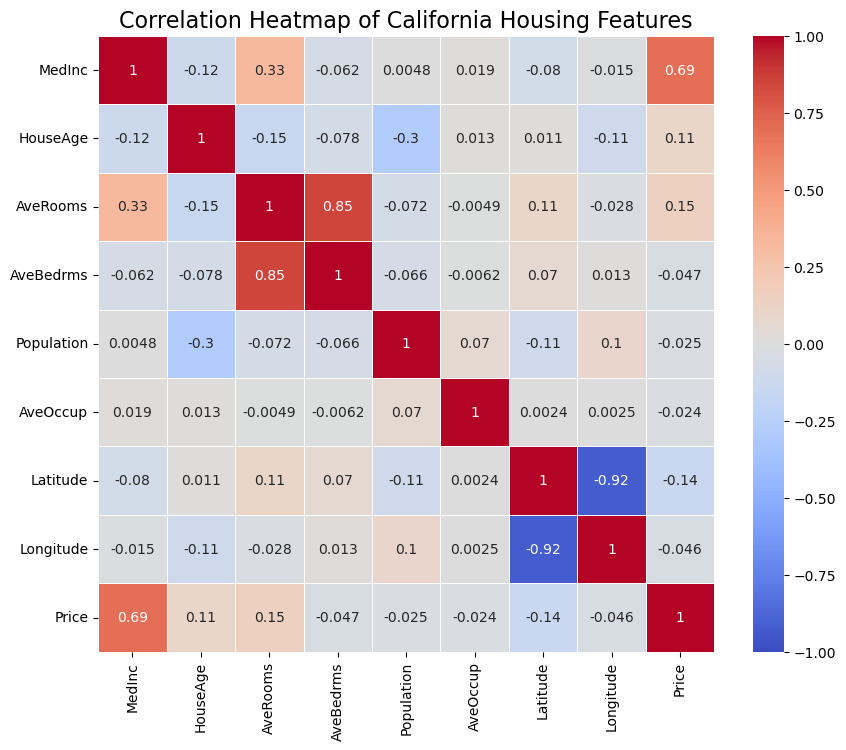

In [29]:
#calculate Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot = True,
            cmap='coolwarm',
            vmin=-1,vmax=1,
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Features',fontsize=16)
plt.show()

In [34]:
X = df[['MedInc']]
y = df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
# print(f"\nLinear Equation: Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")
print(f"\nLinear Equation: Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")



Linear Equation: Price = 0.42 * MedInc + 0.44


In [39]:
#Predict and Evaluate 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"\nMAE: {mae:.2f} $100K")
print(f"MSE:{rmse:.2f} $100K")
print(f"R2:{r2:.2f}")


MAE: 0.63 $100K
MSE:0.84 $100K
R2:0.46


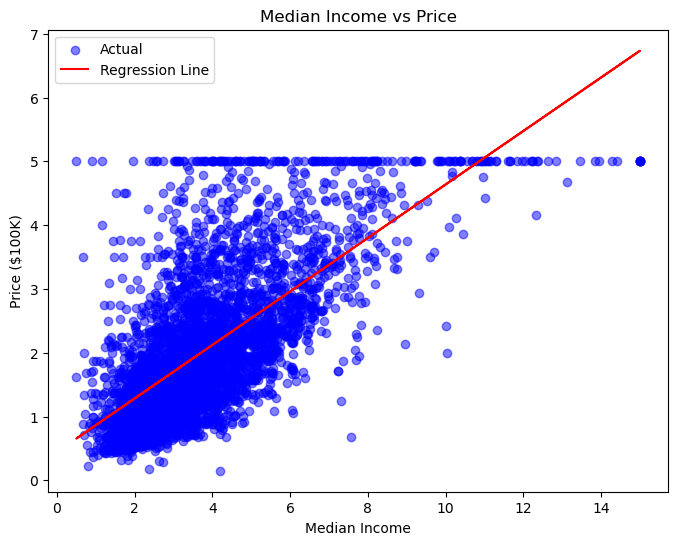

In [37]:
#Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='blue',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.title('Median Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')
plt.legend()
plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['Price'] = california.target
X = df.drop('Price',axis=1)
y = df ['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(f"R2:{r2:.2f}")

R2:0.58


In [45]:
residuals = y_test - y_pred

print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted': y_pred[:5],'Residual': residuals[:5]}))



First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


Positive Residual : Model underpredicted(e.g 0.560 = $56K too low)

Negative Residual : Model overpredicted (e.g       = $56K too high)

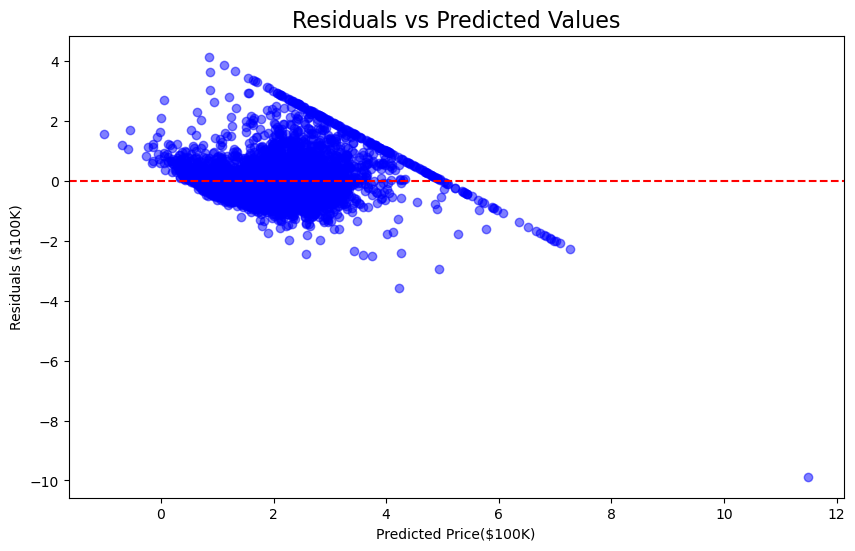

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residuals vs Predicted Values',fontsize=16)
plt.xlabel('Predicted Price($100K)')
plt.ylabel('Residuals ($100K)')
plt.show()

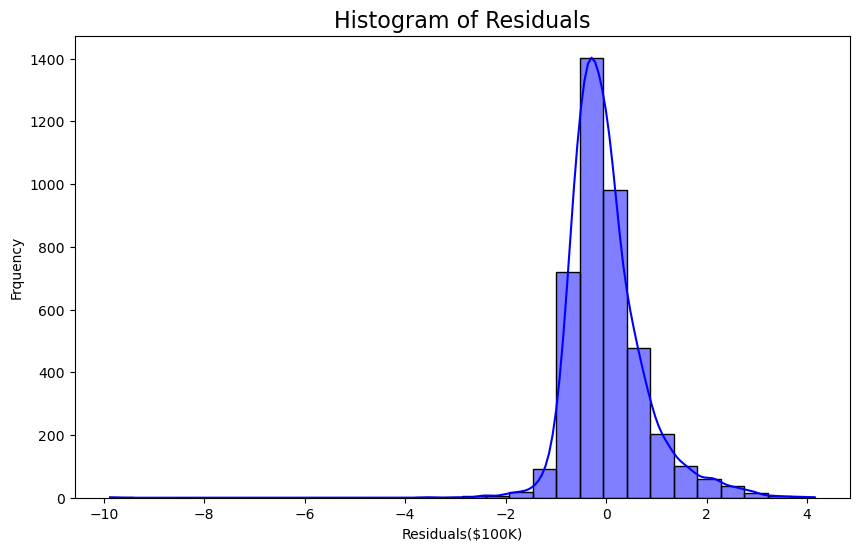

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residuals($100K)')
plt.ylabel('Frquency')
plt.show()

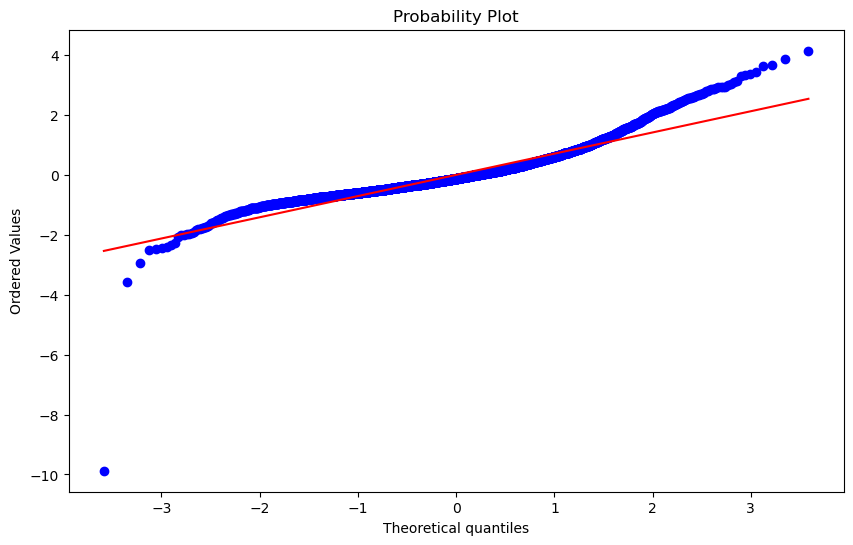

In [48]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.show()

In [ ]:
***Normalisation(Min-Max Scaling)
X=